In [97]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# DATA PREPROCESSING

### Training Image Preprocessing

In [19]:
import os
import shutil

# Directory containing images and annotation text file
directory = 'train'

# Read the annotation text file
with open(os.path.join(directory, '_annotations.txt'), 'r') as file:
    lines = file.readlines()

# Process each line in the annotation text file
for line in lines:
    parts = line.strip().split()
    image_name = parts[0]
    annotations = parts[1:]

    # Determine the class ID from the first annotation (assuming all annotations for an image have the same class ID)
    class_id = annotations[0].split(',')[-1]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(directory, f'class_{class_id}')
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the image to the class directory
    image_path = os.path.join(directory, image_name)
    new_image_path = os.path.join(class_dir, image_name)
    shutil.move(image_path, new_image_path)

print('Images have been moved to separate folders based on annotations.')


Images have been moved to separate folders based on annotations.


In [98]:
training_set = tf.keras.utils.image_dataset_from_directory(
    './train/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 1236 files belonging to 3 classes.


### VALIDATION

In [27]:
import os
import shutil

# Directory containing images and annotation text file
directory = 'valid'

# Read the annotation text file
with open(os.path.join(directory, '_annotations.txt'), 'r') as file:
    lines = file.readlines()

# Process each line in the annotation text file
for line in lines:
    parts = line.strip().split()
    image_name = parts[0]
    annotations = parts[1:]

    # Determine the class ID from the first annotation (assuming all annotations for an image have the same class ID)
    class_id = annotations[0].split(',')[-1]

    # Create a directory for the class if it doesn't exist
    class_dir = os.path.join(directory, f'class_{class_id}')
    if not os.path.exists(class_dir):
        os.makedirs(class_dir)

    # Move the image to the class directory
    image_path = os.path.join(directory, image_name)
    new_image_path = os.path.join(class_dir, image_name)
    shutil.move(image_path, new_image_path)

print('Images have been moved to separate folders based on annotations.')

Images have been moved to separate folders based on annotations.


In [99]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    './valid/',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 200 files belonging to 3 classes.


In [100]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [101]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[ 39.  39.  39.]
   [  2.   2.   2.]
   [  0.   0.   0.]
   ...
   [131. 131. 131.]
   [  3.   3.   3.]
   [  3.   3.   3.]]

  [[ 78.  78.  78.]
   [  5.   5.   5.]
   [  0.   0.   0.]
   ...
   [106. 106. 106.]
   [ 87.  87.  87.]
   [  0.   0.   0.]]

  [[  6.   6.   6.]
   [138. 138. 138.]
   [108. 108. 108.]
   ...
   [ 43.  43.  43.]
   [156. 156. 156.]
   [  0.   0.   0.]]

  ...

  [[155. 155. 155.]
   [ 73.  73.  73.]
   [160. 160. 160.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[117. 117. 117.]
   [147. 147. 147.]
   [151. 151. 151.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]

  [[137. 137. 137.]
   [ 91.  91.  91.]
   [ 51.  51.  51.]
   ...
   [  0.   0.   0.]
   [  0.   0.   0.]
   [  0.   0.   0.]]]


 [[[244. 255. 237.]
   [233. 253. 204.]
   [246. 244. 231.]
   ...
   [226. 208. 184.]
   [130. 162.  99.]
   [227. 225. 187.]]

  [[ 24.  41.   7.]
   [ 35.  41.  41.]
   [ 36.  31.  37.]
   ...
   [146. 1

# Building Model

In [102]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [103]:
model=Sequential()

In [104]:
## Bulding Cobvolution Model

In [105]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [106]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))


In [107]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [108]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [109]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [110]:
model.add(Dropout(0.25))

In [111]:
model.add(Flatten())

In [112]:
from tensorflow.keras.regularizers import l2


model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01)))

In [113]:
model.add(Dropout(0.4))

In [114]:
#output layer
model.add(Dense(units=3,activation='softmax'))

In [115]:
import os
os.environ['TF_USE_LEGACY_KERAS'] = 'True'
import tensorflow as tf

# Compilling Model

In [116]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [117]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_50 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_51 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_30 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_52 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_53 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_54 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,237,539 (19.98 MB)

 Trainable params: 5,237,539 (19.98 MB)

 Non-trainable params: 0 (0.00 B)

## MODEL TRAINING

In [118]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.3971 - loss: 6.1106 - val_accuracy: 0.3800 - val_loss: 5.1886
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.4359 - loss: 5.0863 - val_accuracy: 0.4550 - val_loss: 4.7225
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.4687 - loss: 4.6935 - val_accuracy: 0.5700 - val_loss: 4.3665
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4644 - loss: 4.3775 - val_accuracy: 0.3450 - val_loss: 4.1538
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5199 - loss: 4.0297 - val_accuracy: 0.3900 - val_loss: 3.8491
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4966 - loss: 3.7733 - val_accuracy: 0.2550 - val_loss: 3.8142
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4842 - loss: 3.5734 - val_accuracy: 0.4500 - val_loss: 3.3714
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.4832 - loss: 3.3367 - val_accuracy: 0.3600 - val_loss

## MODEL EVALUATION

In [119]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print('Training accuracy:', train_acc)

39/39 ━━━━━━━━━━━━━━━━━━━━ 9s 240ms/step - accuracy: 0.5470 - loss: 2.7935
Training accuracy: 0.5558252334594727


In [120]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print('Validation accuracy:', val_acc)

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 246ms/step - accuracy: 0.4988 - loss: 2.8489
Validation accuracy: 0.4950000047683716


# SAVING MODEL

In [121]:
model.save('trained_plant_disease_model.keras')

In [122]:
training_history.history

{'accuracy': [0.40857604146003723,
  0.4563106894493103,
  0.47653722763061523,
  0.4676375389099121,
  0.5266990065574646,
  0.495954692363739,
  0.5226536989212036,
  0.491909384727478,
  0.5525889992713928,
  0.5404530763626099],
 'loss': [5.627354621887207,
  4.985726356506348,
  4.622377872467041,
  4.302950382232666,
  3.971235752105713,
  3.7171030044555664,
  3.4892940521240234,
  3.294018507003784,
  3.0756967067718506,
  2.905320167541504],
 'val_accuracy': [0.3799999952316284,
  0.45500001311302185,
  0.5699999928474426,
  0.3449999988079071,
  0.38999998569488525,
  0.2549999952316284,
  0.44999998807907104,
  0.36000001430511475,
  0.30000001192092896,
  0.4950000047683716],
 'val_loss': [5.1885881423950195,
  4.722515106201172,
  4.366549491882324,
  4.153774261474609,
  3.849106788635254,
  3.814188241958618,
  3.3713560104370117,
  3.3020448684692383,
  3.1072843074798584,
  2.8484296798706055]}

In [123]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [124]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [125]:
training_history.history['accuracy']

[0.40857604146003723,
 0.4563106894493103,
 0.47653722763061523,
 0.4676375389099121,
 0.5266990065574646,
 0.495954692363739,
 0.5226536989212036,
 0.491909384727478,
 0.5525889992713928,
 0.5404530763626099]

#  Accuracy Visualization

ValueError: x and y must have same first dimension, but have shapes (15,) and (10,)

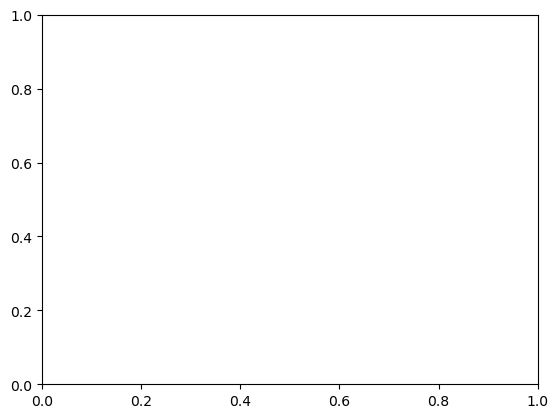

In [126]:
epochs = [i for i in range(1,16)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [127]:
class_name = validation_set.class_names

In [128]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 200 files belonging to 3 classes.


In [129]:
y_pred = model.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

200/200 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step


In [130]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [131]:
Y_true

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)>

In [132]:
predicted_categories

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([2, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 2, 1, 0, 0, 0, 1,
       0, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0,
       2, 2, 0, 0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 1, 1, 0,
       0, 2, 2, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 0, 2, 2,
       1, 2], dtype=int64)>

In [133]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [134]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

              precision    recall  f1-score   support

     class_0       0.70      0.56      0.62       121
     class_1       0.28      0.35      0.31        26
     class_2       0.31      0.42      0.35        53

    accuracy                           0.49       200
   macro avg       0.43      0.44      0.43       200
weighted avg       0.54      0.49      0.51       200



# Confusion Matrix Visualization

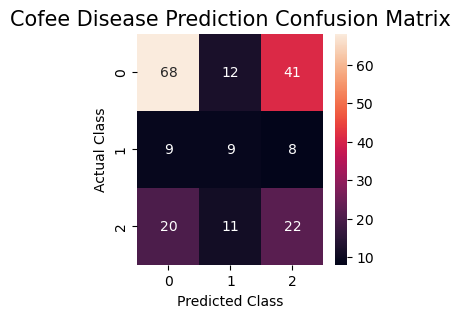

In [135]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 10)
plt.ylabel('Actual Class',fontsize = 10)
plt.title('Cofee Disease Prediction Confusion Matrix',fontsize = 15)
plt.show()

In [136]:
class_name

['class_0', 'class_1', 'class_2']